In [166]:
#importing necessary files/libraries
#Logistic Regression Model (using one-hot encoding): Binary Classification
import pandas as pd

#numerical calculation
import numpy as np

import matplotlib.pyplot as plt 
plt.rc("font", size=14)

#for modeling the machine learning algorithms: use sklearn
from sklearn import preprocessing
from sklearn.metrics import accuracy_score

from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression

#metrics class: We used confusion matrix for analysis of our model, used for calculating accuracy
from sklearn import metrics
from sklearn.linear_model import LogisticRegression
import seaborn as sns
from subprocess import check_output
sns.set(style="white")
sns.set(style="whitegrid", color_codes=True)



In [167]:
#reading data from train and test files on the system
#calling read_csv function with dataset path as parameter
#Loading dataset into pandas dataframe

data=pd.read_csv("C:/Users/Rajashree.Jain/Documents/train.csv")
tdata=pd.read_csv("C:/Users/Rajashree.Jain/Documents/test.csv")

print (data.shape)#returns row and columns (tuple) counts of a dataset
print (list(data.columns))#returns list

(891, 12)
['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp', 'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked']


In [168]:
data.describe() #performs statistics only on numerical values

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [169]:
 data.get_dtype_counts()#gives count of all data types. Object datatypes are almost analogous to string

float64    2
int64      5
object     5
dtype: int64

In [170]:
data.nunique() # for non-numeric data types, gives unique values for these features

PassengerId    891
Survived         2
Pclass           3
Name           891
Sex              2
Age             88
SibSp            7
Parch            7
Ticket         681
Fare           248
Cabin          147
Embarked         3
dtype: int64

In [171]:
data['Cabin'].head(10)

0     NaN
1     C85
2     NaN
3    C123
4     NaN
5     NaN
6     E46
7     NaN
8     NaN
9     NaN
Name: Cabin, dtype: object

In [172]:
#defining a function that returns number of missing rows/columns
def missing(x):
  return sum(x.isnull())

#Applying per column:
print ("Missing values per column: ")
print (data.apply(missing, axis=0)) #axis=0 defines that function is to be applied on each column

#Applying per row:
print ("\nMissing values per row:")
print (data.apply(missing, axis=1).head()) #axis=1 defines that function is to be applied on each row
#.head() used because rows are many, so only few are displayed

Missing values per column: 
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Missing values per row:
0    1
1    0
2    1
3    0
4    1
dtype: int64


In [173]:
#age, cabin and embarked have missing values

data['Age'].mean()

29.69911764705882

In [174]:
data['Age'].mode()



0    24.0
dtype: float64

In [175]:
tdata['Age'].mean()

30.272590361445783

In [176]:
tdata['Age'].mode()#you can get 2 values for mode

0    21.0
1    24.0
dtype: float64

In [177]:
#replacing missing values by 24 ie mode
data['Age'].fillna(24,inplace=True)
tdata['Age'].fillna(24,inplace=True)

In [178]:
tdata.Age.isnull().values.any()#to check if all values have been filled. False indicates they have been filled now

False

In [179]:
data['Embarked'].mode()

0    S
dtype: object

In [180]:
data['Embarked'].fillna('S',inplace=True)
tdata['Embarked'].fillna('S',inplace=True)

In [181]:
tdata.Embarked.isnull().values.any()

False

In [182]:
tdata.Fare.isnull().values.any()#there are missing values

True

In [183]:
tdata.Fare.mean()

35.6271884892086

In [184]:
tdata['Fare'].fillna(tdata.Fare.mean(),inplace=True)

In [185]:
tdata.Cabin.isnull().values.any() #there are missing values but we'll drop cabin anyway

True

In [186]:
data.drop(columns='Name')
data.drop(columns='Cabin')
data.drop(columns='Ticket')
tdata=tdata.drop(['Name','Cabin','Ticket'], axis=1)

In [187]:
#Intended columns have been removed
tdata.head()


,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,3,male,34.5,0,0,7.8292,Q
1,893,3,female,47.0,1,0,7.0000,S
2,894,2,male,62.0,0,0,9.6875,Q
3,895,3,male,27.0,0,0,8.6625,S
4,896,3,female,22.0,1,1,12.2875,S


In [188]:
data['PassengerId'].is_unique

True

In [189]:
#label-based indexing is useful for accessing data
data=data.set_index('PassengerId')#replacing existing with this one
data.head()


,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


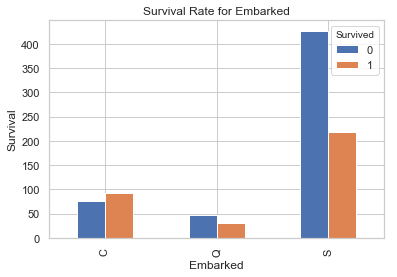

In [190]:
#data analysis/visualization from here, to choose appropriate attributes for building the model

#embarked vs. survival
%matplotlib inline
pd.crosstab(data.Embarked,data.Survived).plot(kind='bar')
plt.title('Survival Rate for Embarked')
plt.xlabel('Embarked')
plt.ylabel('Survival')
plt.savefig('Survival_Embarked')

#Consider Embarked

In [191]:
#Converting Embarked values to numeric, using disctionary and the mapping function

data['Embarked']=data['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)
tdata['Embarked']=tdata['Embarked'].map({'S':0, 'C':1, 'Q':2}).astype(int)

data.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,0
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,1
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,0
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,0
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,0


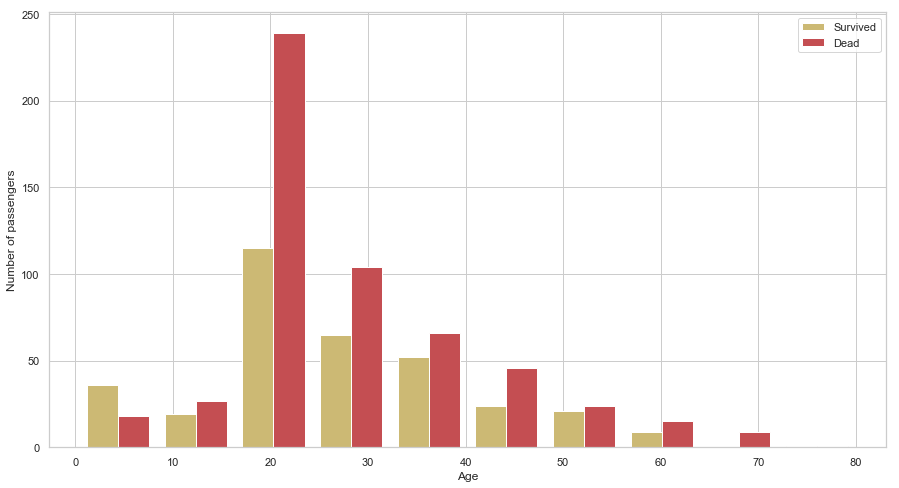

In [192]:
#Age vs. Survival
figure = plt.figure(figsize=(15,8))
plt.hist([data[data['Survived']==1]['Age'],data[data['Survived']==0]['Age']], color = ['y','r'],label = ['Survived','Dead'])#plots histogram
plt.xlabel('Age')
plt.ylabel('Number of passengers')
plt.legend()

#Consider Age

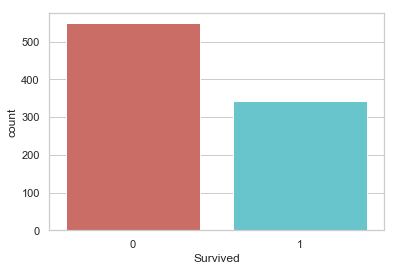

<Figure size 432x288 with 0 Axes>

In [193]:
#statistics of survived
sns.countplot(x='Survived', data=data, palette='hls')
plt.show()
plt.savefig('count_plot')

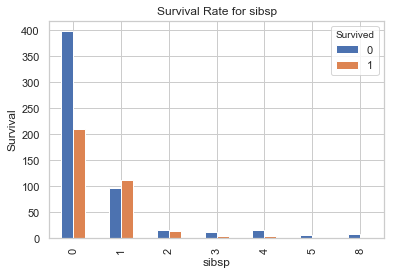

In [194]:
%matplotlib inline
pd.crosstab(data.SibSp,data.Survived).plot(kind='bar')
plt.title('Survival Rate for sibsp')
plt.xlabel('sibsp')
plt.ylabel('Survival')
plt.savefig('Survival_Sibsp')

#Consider SibSp

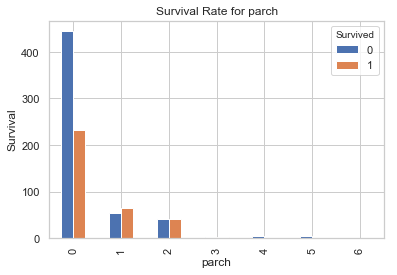

In [195]:
%matplotlib inline
pd.crosstab(data.Parch,data.Survived).plot(kind='bar')
plt.title('Survival Rate for parch')
plt.xlabel('parch')
plt.ylabel('Survival')
plt.savefig('Survival_Parch')

#Consider Parch

In [196]:
#applying logistic regression using one-hot encoding method
dataset = data[['Pclass','Sex','Age','Fare','SibSp','Parch','Embarked']]#features I'm taking into consideration for predicting survival
one_hot_encoded_training_predictors = pd.get_dummies(dataset)#converts categorical data into dimensional/matrix form
one_hot_encoded_training_predictors.head()
#shown below

,Pclass,Age,Fare,SibSp,Parch,Embarked,Sex_female,Sex_male
PassengerId,,,,,,,,
1,3,22.0,7.2500,1,0,0,0,1
2,1,38.0,71.2833,1,0,1,1,0
3,3,26.0,7.9250,0,0,0,1,0
4,1,35.0,53.1000,1,0,0,1,0
5,3,35.0,8.0500,0,0,0,0,1


In [197]:
#dividing the data in training and test data 
x = one_hot_encoded_training_predictors #to consider
y = data['Survived'] #to predict

xtrain, xtest, ytrain, ytest = train_test_split(x, y, test_size=0.319, random_state=1)
#Random state will randomly select comlumns

#Split arrays or matrices into random train and test subsets
logreg = LogisticRegression()
logreg.fit(xtrain, ytrain)#fit logistic regression to the training set, i.e. for building the model
prediction = logreg.predict(xtest) #predicting the values of test set
print('Accuracy of logistic regression : {:.2f}'.format(logreg.score(xtest, ytest)))

Accuracy of logistic regression : 0.78


In [198]:
#logistic regression model analysis
#showing summary
import statsmodels.api as sm
logit_model=sm.Logit(y,x)
result=logit_model.fit()
print(result.summary2())

Optimization terminated successfully.
         Current function value: 0.442579
         Iterations 6
                         Results: Logit
Model:              Logit            Pseudo R-squared: 0.335     
Dependent Variable: Survived         AIC:              804.6755  
Date:               2018-11-29 19:18 BIC:              843.0142  
No. Observations:   891              Log-Likelihood:   -394.34   
Df Model:           7                LL-Null:          -593.33   
Df Residuals:       883              LLR p-value:      6.4681e-82
Converged:          1.0000           Scale:            1.0000    
No. Iterations:     6.0000                                       
------------------------------------------------------------------
               Coef.   Std.Err.     z     P>|z|    [0.025   0.975]
------------------------------------------------------------------
Pclass        -1.1158    0.1414  -7.8918  0.0000  -1.3930  -0.8387
Age           -0.0373    0.0077  -4.8479  0.0000  -0.0523  -0.

In [199]:
#confusion matrix
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(ytest, prediction)
print(confusion_matrix)
#diagonal elements represent correct and incorrect predictions
#142+79 correct predictions and 41+23 incorrect predictions

[[142  23]
 [ 41  79]]
